# Car Price Prediction - Multiple Linear Regression

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Columns description
car_ID: Unique ID # for each car

Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)

CarName: Make and model of car

Fueltype: Car Fuel Type (gas or diesel)

Aspiration: Car Aspiration (standard or turbo)

Doornumber: Number of car doors (two or four)

Carbody: Type of car body (convertible, sedan, hatchback, wagon, or hardtop)

Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)

Enginelocation: Location of car engine (front of rear)

Wheelbase: Car wheel base in inches

Carlength: Car length in inches

Carwidth: Car width in inches

Carheight: Car height in inches

Curbweight: Car weight in pounds

Enginetype: Car engine type (dohc, dohcv, I, ohc, ohcf, ohcv, or rotor)

Cylindernumber: Number of car cylinders (two, three, four, five, six, eight, or twelve)

Enginesize: Size of engine (numerical values of cubic inches)

Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)

Boreratio: Car Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length

Stroke: Car strokes (numerical value in strokes)

Compressionratio: Car compression ratio (ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume))

Horsepower: Car horsepower (numerical values of horsepower)

Peakrpm: Car peak RPM (revolutions per minute)

Citympg: Car city MPG (miles per gallon)

Highwaympg: Car highway MPG (miles per gallon)

Price: total price of car in dollars

### Link: https://www.kaggle.com/code/pradeepdatascientist/car-price-prediction-multiple-linear-regression/notebook

## Import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

## Data reading

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

## Data exploration

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Missing values check

<AxesSubplot:>

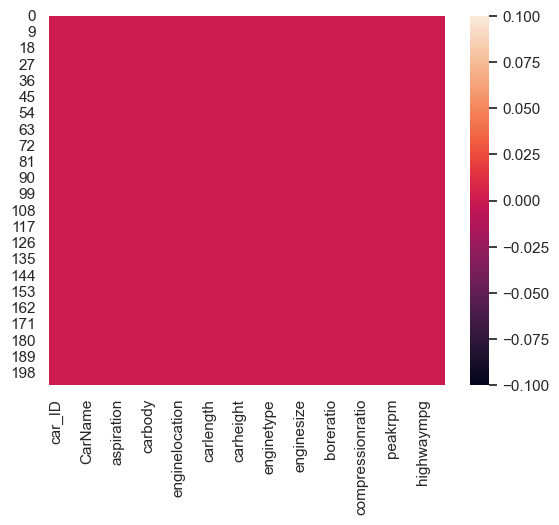

In [4]:
sns.heatmap(df.isna())

#### Duplicated values check

In [5]:
df.duplicated().sum()

0

#### Numeric data stats

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Correlation heatmap

<AxesSubplot:>

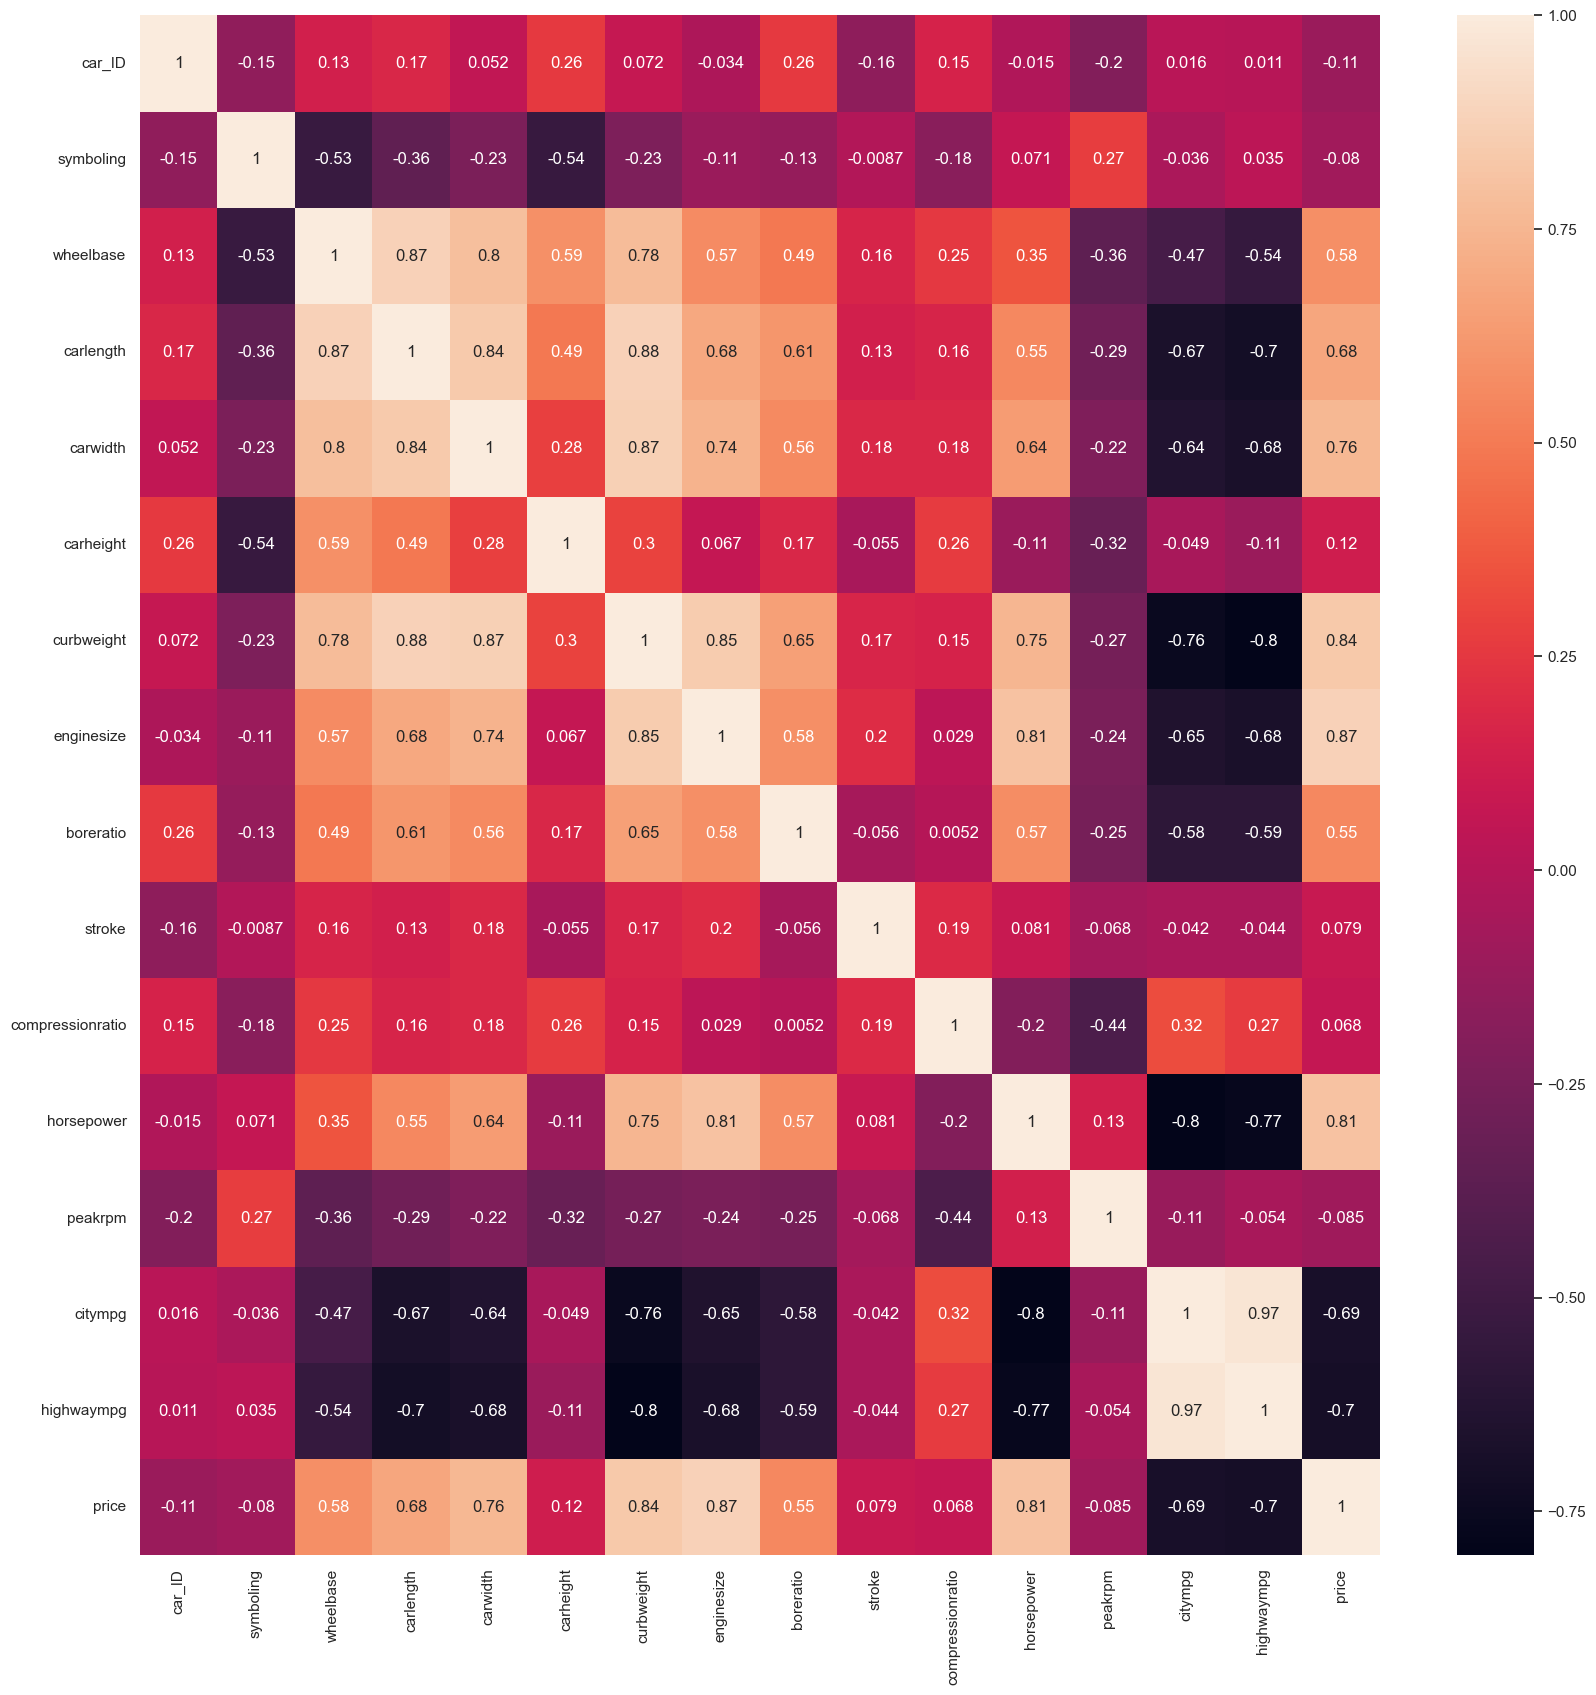

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## Data visualisation

In [8]:
df['Make'] = df.CarName.str.split(' ').apply(lambda x:x[0].lower())
df['Model'] = df.CarName.str.split(' ').apply(lambda x: (' '.join(map(str, x[1:])))).apply(lambda y: y.lower())

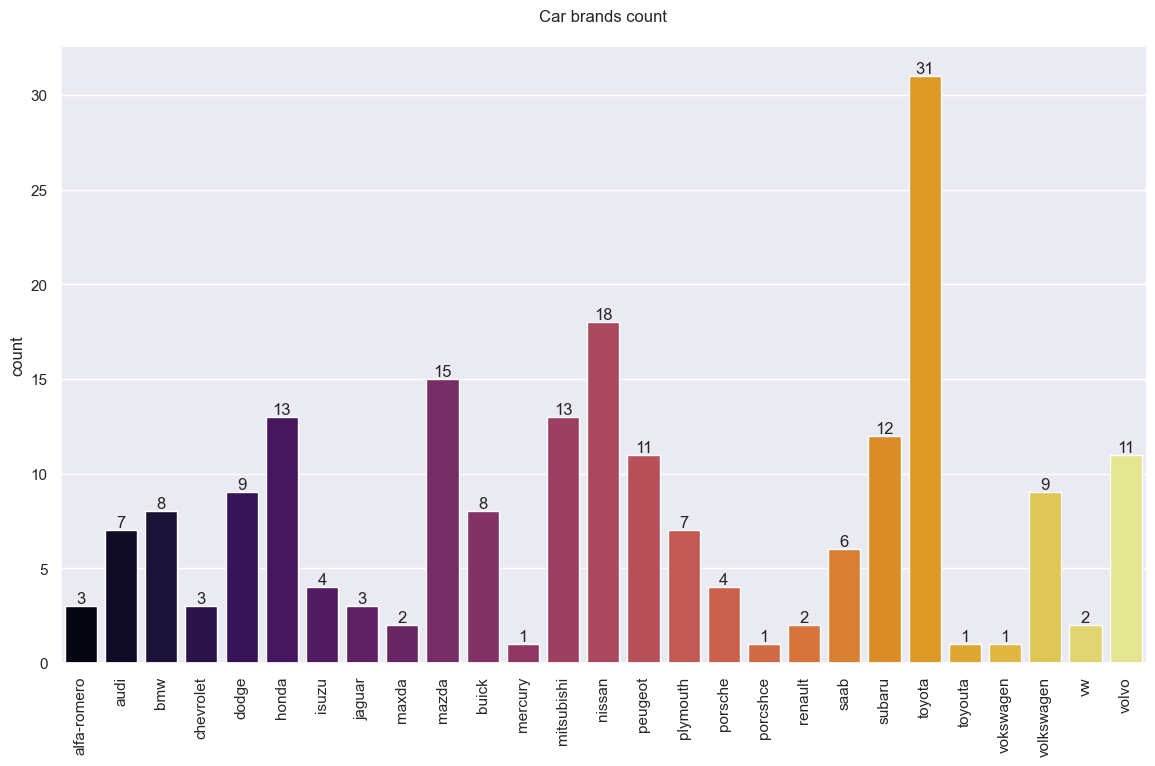

In [9]:
plt.figure(figsize = (14,8))
ax = sns.countplot(x = df.Make, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Car brands count\n')
plt.xticks(rotation = 90)
plt.xlabel('')
sns.despine()

Text(0.5, 1.0, 'Prices histogram\n')

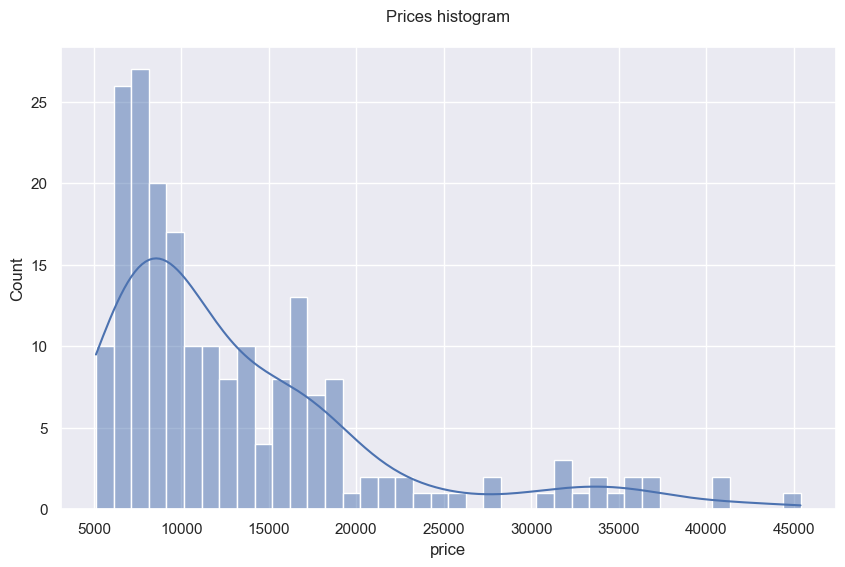

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde = True, bins = 40)
plt.title('Prices histogram\n')

Text(0.5, 1.0, 'Horsepower histogram\n')

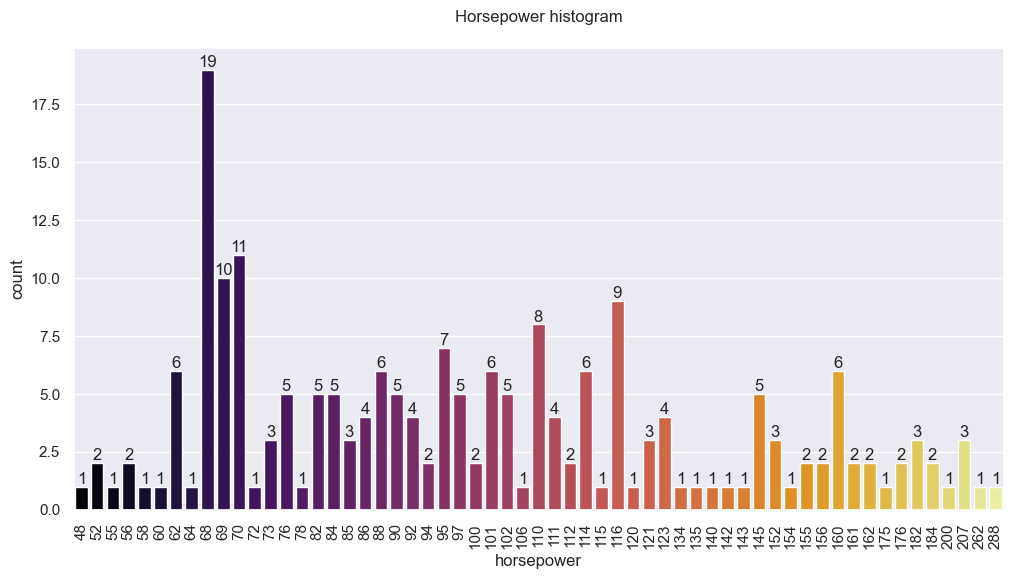

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = df['horsepower'], palette='inferno')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('Horsepower histogram\n')

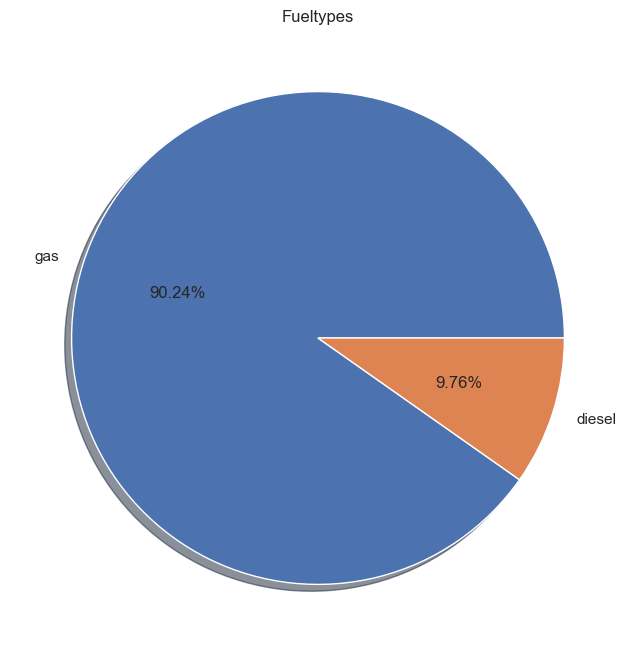

In [12]:
plt.figure(figsize=(8,8))
df['fueltype'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('Fueltypes')
plt.ylabel('')
plt.show()

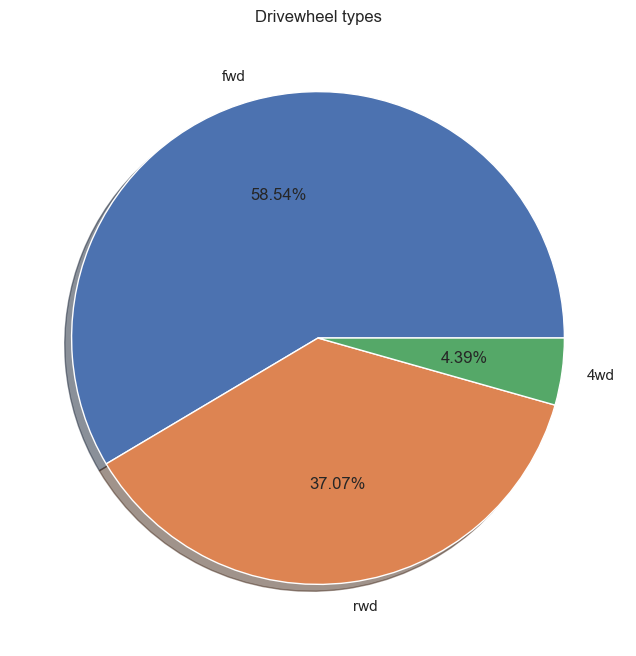

In [13]:
plt.figure(figsize=(8,8))
df['drivewheel'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('Drivewheel types')
plt.ylabel('')
plt.show()

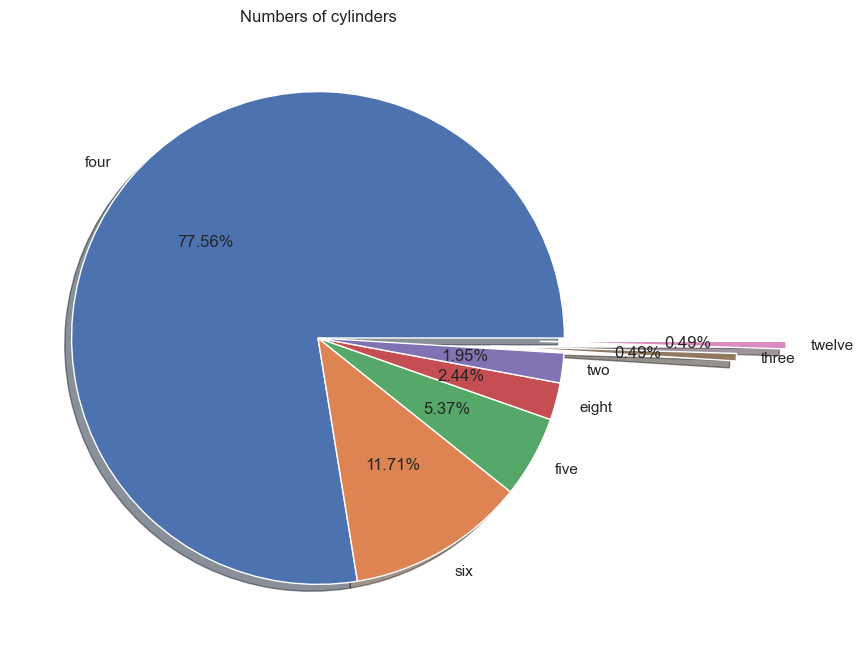

In [14]:
plt.figure(figsize=(8,8))
df['cylindernumber'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True, explode=(0,0,0,0,0,0.7,0.9))
plt.title('Numbers of cylinders')
plt.ylabel('')
plt.show()

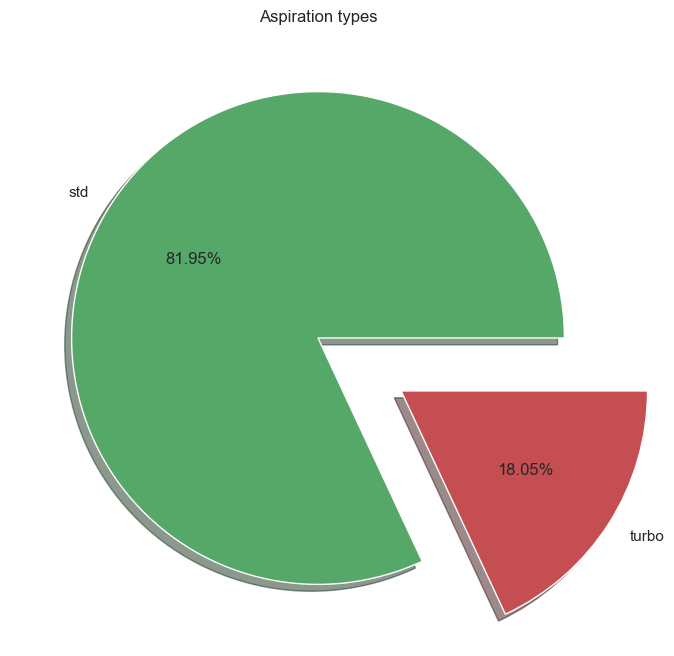

In [15]:
plt.figure(figsize=(8,8))
df['aspiration'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True,explode=(0, 0.4), colors = ['g','r'])
plt.title('Aspiration types')
plt.ylabel('')
plt.show()

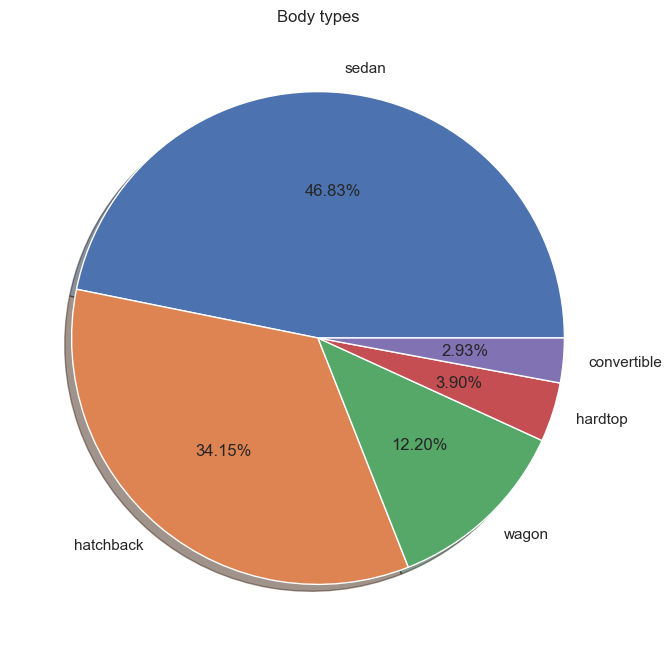

In [16]:
plt.figure(figsize=(8,8))
df['carbody'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('Body types')
plt.ylabel('')
plt.show()

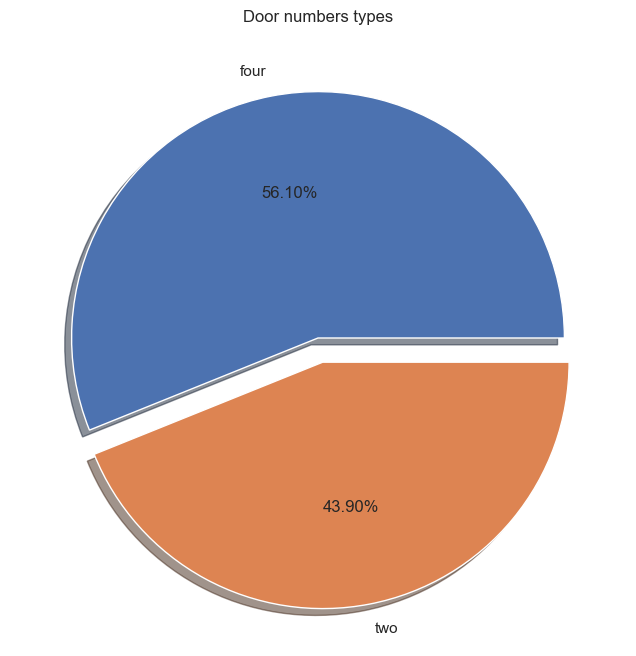

In [17]:
plt.figure(figsize=(8,8))
df['doornumber'].value_counts().plot.pie(autopct='%1.2f%%', shadow = True, explode = (0, 0.1))
plt.title('Door numbers types')
plt.ylabel('')
plt.show()

### Analysis results:
Most popular car brand: Toyota.

Average car has non-aspirated 4 cylinders petrol engine and front-wheel drive transmission.

Average body type is 4-door sedan with less than 100 horsepowers.

Most common prices are under $10,000.

When increasing cylinder number, engine size or horsepower the price is increasing.

The wheelbase, car length and car width have effect in price, but the Car height don't have any effect.

## Non-numeric data filtration and dropping features which has correlation with price > 0.7

In [18]:
dff = df.drop(columns=['citympg', 'highwaympg','Make', 'Model','car_ID','CarName','fueltype', 'aspiration',
                       'doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])
dff.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0


In [19]:
df.dtypes == 'object'

car_ID              False
symboling           False
CarName              True
fueltype             True
aspiration           True
doornumber           True
carbody              True
drivewheel           True
enginelocation       True
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype           True
cylindernumber       True
enginesize          False
fuelsystem           True
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
Make                 True
Model                True
dtype: bool

### Encoding categorical data and adding it to numerical data

In [20]:
encoder = LabelEncoder()
cat_list = ['aspiration','doornumber', 'cylindernumber', 'drivewheel', 'carbody', 'fueltype']
for cat in cat_list:
    dff[cat] = encoder.fit_transform(df[cat])

In [21]:
dff.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,aspiration,doornumber,cylindernumber,drivewheel,carbody,fueltype
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,0,1,2,2,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,0,1,2,2,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,0,1,3,2,2,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,0,0,2,1,3,1
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,0,0,1,0,3,1


### All types are numeric. Data is ready for regression analysis.

In [22]:
dff.dtypes

symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
price               float64
aspiration            int64
doornumber            int64
cylindernumber        int64
drivewheel            int64
carbody               int64
fueltype              int64
dtype: object

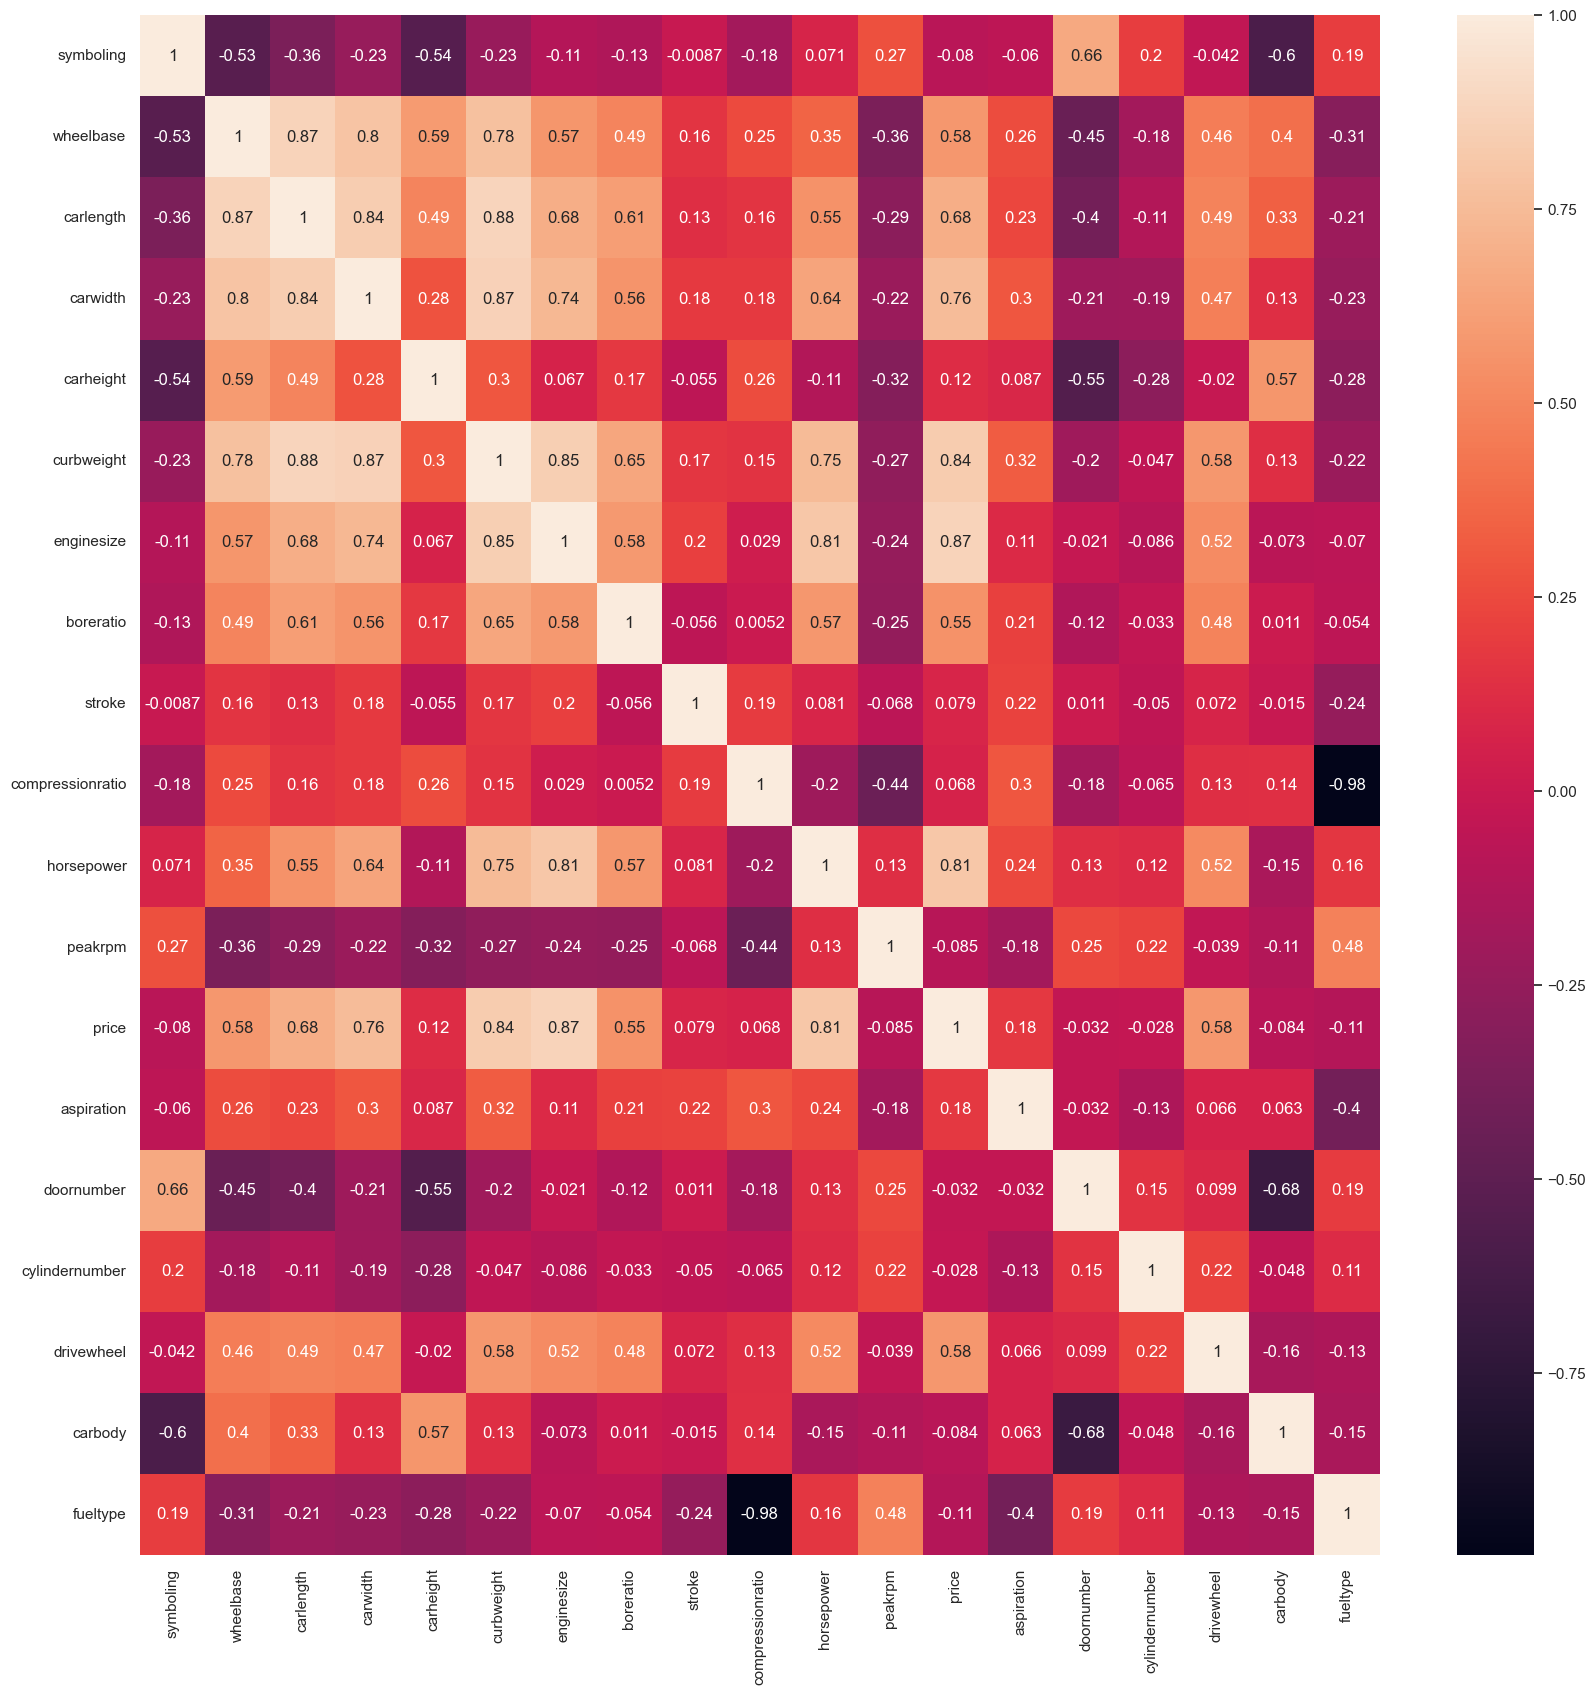

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(), annot=True)
plt.show()

### Delete high-correlated features to predictable column

In [24]:
dff = dff.drop(columns = ['horsepower','carwidth','curbweight','enginesize'])

In [25]:
ls = dff.columns.to_list()
features = [x for x in ls if x != 'price']
features

['symboling',
 'wheelbase',
 'carlength',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'aspiration',
 'doornumber',
 'cylindernumber',
 'drivewheel',
 'carbody',
 'fueltype']

In [26]:
X = dff[features]
y = dff['price']

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

## Linear Regression model

In [28]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [29]:
model.predict(xtest)

array([19928.3262411 , 15887.73234091,  9806.63525245, 20281.88861455,
       16482.16296364,  9870.50172676,  8413.41034644,  6747.39236908,
        9992.98292933,  7790.15557731, 14223.18312896, 12072.55503295,
       14528.5344846 , 12655.36836349, 31120.65590472,  5064.55302855,
       -3368.78825691, 13716.55261649,  9993.63754579, 12405.08767214,
       11083.92639804, 14735.02832497, 11363.28540966, -1954.94238725,
        4505.42168034, 23235.08548852, 19967.51531934, 18594.00720794,
        5893.33985176, 22017.73006878, 20252.67106736,  7312.19330109,
         941.17560963, 22856.64383388,  6899.78487154, 24512.993046  ,
        9113.89137552, 16060.55322402,  3721.95216252, 13740.72213113,
        8948.31994193, 11238.62123169, 20382.53410411,  2345.19483509,
        6096.33860122, 12106.18156422,  7312.19330109,  5491.97803571,
       17053.76140051, 13708.12577464,  6790.3757109 , 21606.59021981,
        3872.7885076 ,  9410.53470502,  5893.33985176, 13883.91689085,
      

In [30]:
model.score(X,y)
print(f'Linear Regression score: {model.score(X,y).round(3)*100} %')

Linear Regression score: 61.5 %


## Descision Tree Regressor model

In [31]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=9)
tree_model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [32]:
tree_model.predict(xtest)

array([36000.        , 23875.        ,  8949.        , 15040.        ,
       31400.5       ,  5937.5       ,  7898.        ,  7778.        ,
        8013.        ,  7942.33333333, 17710.        ,  8058.        ,
       14265.        , 10898.        , 45400.        ,  5937.5       ,
        5118.        , 14869.        ,  6989.        ,  7260.5       ,
       10245.        , 13499.        ,  6189.        ,  6829.        ,
        8916.5       , 36000.        , 11199.        , 16761.66666667,
        7260.5       , 15985.        , 31400.5       ,  5937.5       ,
        8778.        , 36000.        ,  7942.33333333, 31400.5       ,
        7260.5       , 14645.        ,  8916.5       , 14869.        ,
        8013.        ,  8058.        , 14265.        ,  8778.        ,
        6849.        ,  7942.33333333,  5937.5       ,  6189.        ,
       15521.25      , 14869.        ,  5399.        , 15812.66666667,
        7942.33333333, 10898.        ,  7260.5       , 17450.        ,
      

In [33]:
tree_model.score(X,y)
print(f'Decision Tree Regressor score: {tree_model.score(X,y).round(3)*100} %')

Decision Tree Regressor score: 93.30000000000001 %


#### Decision Tree Regressor gives the best predition score

## Scaled Linear Regression 

In [34]:
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [35]:
xtrain_std = pd.DataFrame(scaler.transform(xtrain), columns= xtrain.columns)
xtest_std = pd.DataFrame(scaler.transform(xtest), columns = xtest.columns)
X_std = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [36]:
md_std = LinearRegression()
md_std.fit(xtrain_std, ytrain)

LinearRegression()

In [37]:
md_std.score(X_std, y)
print(f'Linear Regression score: {md_std.score(X_std,y).round(3)*100} %')

Linear Regression score: 61.5 %


#### Scaled Linear Regression gives the same results as non-scaled version

## Decision Tree Regressor model visualisation

<AxesSubplot:>

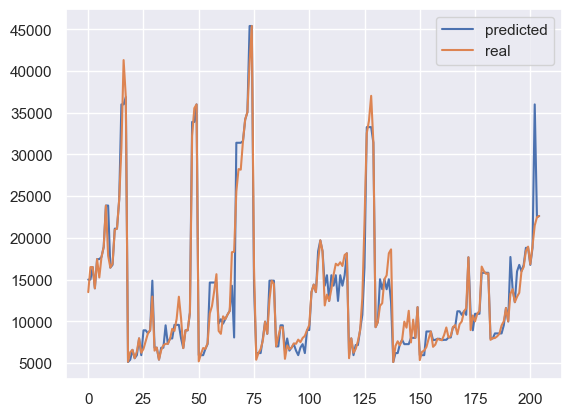

In [53]:
pd.DataFrame({'predicted':tree_model.predict(X), 'real':y}).plot()